# Homework Assignment 7 - Chem 277B
## Neural Networks and Deep Learning

### 1) Objective

The goal is to perform different regression and classification tasks using neural networks and to compare the performance to standard tools such as linear regression. In order to understand how an ANN actually works, we want to use our custom layers (see lecture) for the analysis.<br>
**Note:** in order to create your ANN efficiently, you can follow the structure provided in the lecture material (ANNI.ipynb, ANNII.ipynb and ANNIII.ipynb)

### 2) Preparation

Before starting, import the necessary libraries for data analysis and visualization. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn.datasets import make_moons

Next, we define our custom layers, such as the dense layer, activation functions and finally an optimizer and a loss function. 

In [98]:
import torch
from torch.nn import Linear, ReLU, Sigmoid, Softmax, Sequential, MSELoss, BCELoss, CrossEntropyLoss
from torch.optim import SGD
from torch.utils.data import DataLoader, TensorDataset

### 3) Regression Task

#### 3.1) Data Generation

First, we will perform a regression task using a neural network on a synthetic dataset generated from an exponential function with added noise.

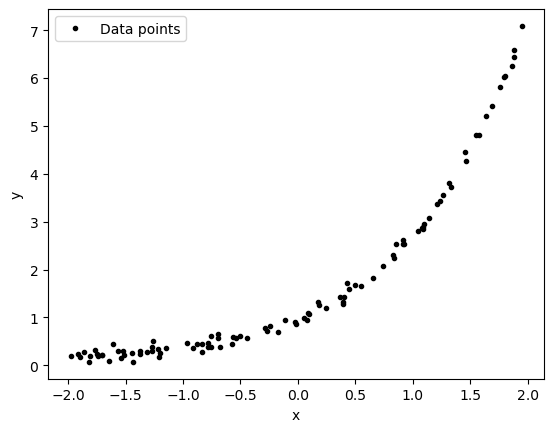

In [54]:
np.random.seed(42)

x = np.random.uniform(-2, 2, (100, 1))
y = np.exp(x) + 0.1 * np.random.randn(len(x), 1)

x_torch = torch.tensor(x, dtype=torch.float32)
y_torch = torch.tensor(y, dtype=torch.float32)
dataset = TensorDataset(x_torch, y_torch)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

plt.plot(x, y, 'k.', label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### 3.2) Linear Model

Without using a neural network, fit a linear regression model to the data and visualize the results. For that purpose, you can use a single dense layer without activation as the model (**recall: the neuron itself is just a linear model**), and use the gradient descent to minimize the mean squared error. Plot the original data points and the model predictions. Discuss the performance of the linear regression model.

100%|██████████| 1000/1000 [00:02<00:00, 390.54it/s]


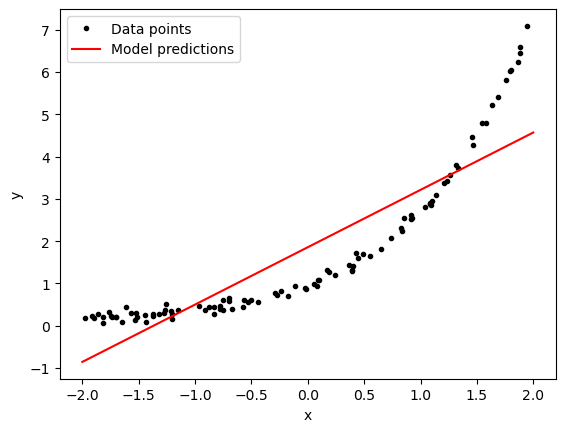

In [56]:
torch.manual_seed(42)

######## Fill in the code below ########
model = Linear(1, 1)
loss_function = MSELoss()
optimizer = SGD(model.parameters(), lr=0.01)

plt.plot(x, y, 'k.', label='Data points')

for epoch in tqdm(range(1000)):
    for x_batch, y_batch in dataloader:
        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(x_batch)

        # Compute loss
        loss = loss_function(y_pred, y_batch)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

xx = torch.linspace(-2, 2, 1000).reshape(-1, 1)
yy = model(xx)
plt.plot(xx.numpy(), yy.detach().numpy(), 'r-', label='Model predictions')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
########################################

*Your discussion*

> The linear regression model can capture the general trend of the data, but it fails to accurately model the exponential relationship since it is inherently a straight line. As a result, the predictions deviate significantly from the actual data points, especially for large and small values of x. This highlights the limitations of linear regression in capturing non-linear patterns in the data.

Some of the early activation functions, like a linear function or a Heaviside step function, are not used in modern neural networks. Explain why these activation functions are not suitable for training deep neural networks.

*Your discussion*

> Linear activation functions do not introduce non-linearity into the model, which is essential for capturing complex patterns in data. Without non-linearity, a deep neural network with multiple layers would effectively behave like a single-layer model, limiting its ability to learn intricate relationships. The Heaviside step function, on the other hand, has a zero gradient almost everywhere, making it unsuitable for gradient-based optimization methods like backpropagation, as it prevents effective weight updates during training.

#### 3.3) Single Neuron

Use a single neuron to fit the same data. Again, train the network using gradient descent to minimize the mean squared error, and plot the original data points and the model predictions. Compare the performance of the single neuron model with that of the linear regression model.

Hint: You need a linear layer to scale the input of the neuron, an activation function (e.g., ReLU, which I recommend for its simplicity and effectiveness), and another linear layer to scale the output of the neuron.

100%|██████████| 1000/1000 [00:03<00:00, 317.94it/s]


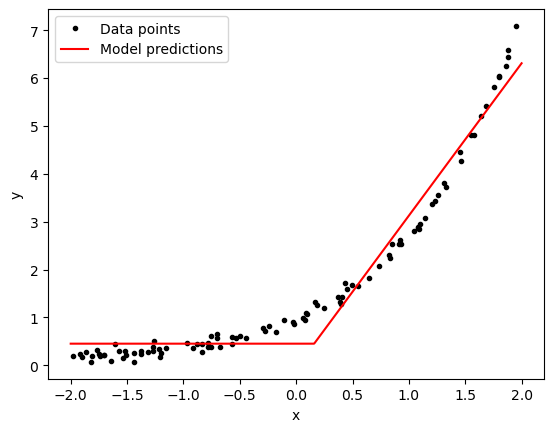

In [57]:
torch.manual_seed(42)

######## Fill in the code below ########
model = Sequential(
    Linear(1, 1),
    ReLU(),
    Linear(1, 1),
)
loss_function = MSELoss()
optimizer = SGD(model.parameters(), lr=0.01)

plt.plot(x, y, 'k.', label='Data points')

for epoch in tqdm(range(1000)):
    for x_batch, y_batch in dataloader:
        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(x_batch)

        # Compute loss
        loss = loss_function(y_pred, y_batch)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

xx = torch.linspace(-2, 2, 1000).reshape(-1, 1)
yy = model(xx)
plt.plot(xx.numpy(), yy.detach().numpy(), 'r-', label='Model predictions')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
########################################

*Your discussion*

> The non-linearity of the neuron allows the neural network to capture the exponential relationship in the data more successfully than the linear regression model. Using ReLU as the activation function effectively performs piecewise linear approximation, enabling the model to fit the data closely. As a result, the neural network's predictions align much better with the actual data points, demonstrating its superiority in modeling non-linear relationships.

#### 3.4) Neural Network

Now, use a neural network with 1 hidden layer containing 2 neurons and an appropriate activation function (e.g., ReLU) to fit the same data. Train the model, plot the original data points and the model predictions, and compare the performance with the previous models.

100%|██████████| 1000/1000 [00:07<00:00, 135.00it/s]


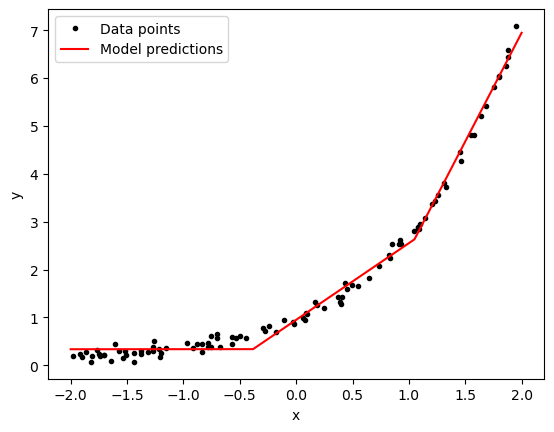

In [58]:
torch.manual_seed(42)

######## Fill in the code below ########
model = Sequential(
    Linear(1, 2),
    ReLU(),
    Linear(2, 1),
)
loss_function = MSELoss()
optimizer = SGD(model.parameters(), lr=0.01)

plt.plot(x, y, 'k.', label='Data points')

for epoch in tqdm(range(1000)):
    for x_batch, y_batch in dataloader:
        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(x_batch)

        # Compute loss
        loss = loss_function(y_pred, y_batch)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

xx = torch.linspace(-2, 2, 1000).reshape(-1, 1)
yy = model(xx)
plt.plot(xx.numpy(), yy.detach().numpy(), 'r-', label='Model predictions')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
########################################

*Your discussion*

> With 2 neurons, the model can do two piecewise linear approximations, allowing it to fit the exponential curve even more closely. The additional neuron provides more flexibility in capturing the non-linear relationship, resulting in predictions that are very close to the actual data points. This demonstrates how increasing the complexity of the neural network can lead to improved performance in modeling complex functions.

#### 3.5) Universal Approximation Theorem

According to the universal approximation theorem, a neural network with a single hidden layer containing a sufficient number of neurons can approximate any continuous function. Try a large number of neurons (e.g., 128 or 1024) in the hidden layer, and see how well the model fits the data. Discuss your observations. Does the theory hold in practice? If not, what could be the reasons and possible solutions? 

Hint: You don't need to implement the solutions, just discuss them. Or you can try them if you want in Question 6 afterwards.

100%|██████████| 1000/1000 [00:03<00:00, 268.48it/s]


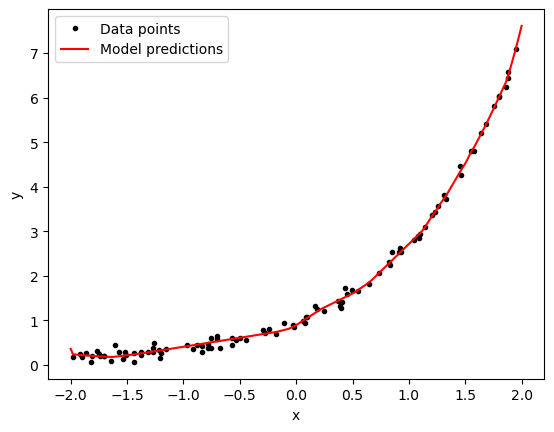

In [59]:
torch.manual_seed(42)

######## Fill in the code below ########
model = Sequential(
    Linear(1, 1024),
    ReLU(),
    Linear(1024, 1),
)
loss_function = MSELoss()
optimizer = SGD(model.parameters(), lr=0.01)

plt.plot(x, y, 'k.', label='Data points')

for epoch in tqdm(range(1000)):
    for x_batch, y_batch in dataloader:
        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(x_batch)

        # Compute loss
        loss = loss_function(y_pred, y_batch)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

xx = torch.linspace(-2, 2, 1000).reshape(-1, 1)
yy = model(xx)
plt.plot(xx.numpy(), yy.detach().numpy(), 'r-', label='Model predictions')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
########################################

*Your discussion*

> The model spends most of its capacity fitting the noise in the data at the center of the x range, leading to overfitting. On the other hand, the outer regions are not well captured, indicating that simply increasing the number of neurons does not guarantee better performance. Further increasing the number of neurons leads to instability in training. A possible solution is to implement regularization techniques, such as L2 regularization or dropout, to prevent overfitting and improve generalization. Additionally, initializing the biases randomly instead of setting them to zero can help break symmetry and improve training.

### 4) Binary Classification Task

#### 4.1) Data Generation

The second task is a binary classification problem. Generate the double moon dataset using the provided function.

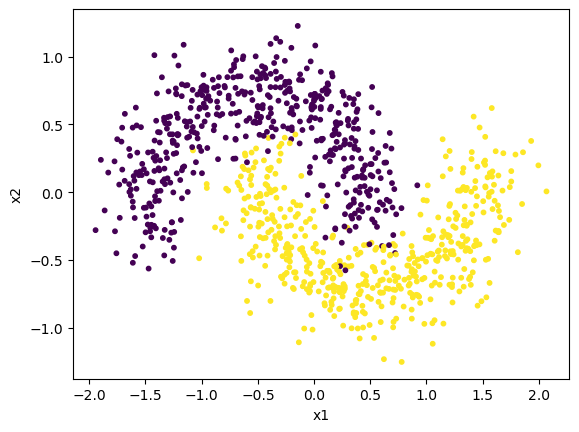

In [ ]:
x, y = make_moons(n_samples=1000, noise=0.2, shuffle=True, random_state=42)
x[:, 0] = x[:, 0] - 0.5
x[:, 1] = x[:, 1] - 0.25
y = y.reshape(-1, 1)

x_torch = torch.tensor(x, dtype=torch.float32)
y_torch = torch.tensor(y, dtype=torch.float32)
dataset = TensorDataset(x_torch, y_torch)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

plt.scatter(x[:, 0], x[:, 1], c=y, s=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#### 4.2) Linear Model

Using a single dense layer without activation as the model, train the network using gradient descent to minimize the binary cross-entropy loss. Plot the data points and the model predictions. Discuss the performance of the linear model.

Hint: The model should output a single value between 0 and 1 to represent the probability of one of the classes. Use the sigmoid activation function after the dense layer to output probabilities between 0 and 1.

100%|██████████| 1000/1000 [00:24<00:00, 40.30it/s]


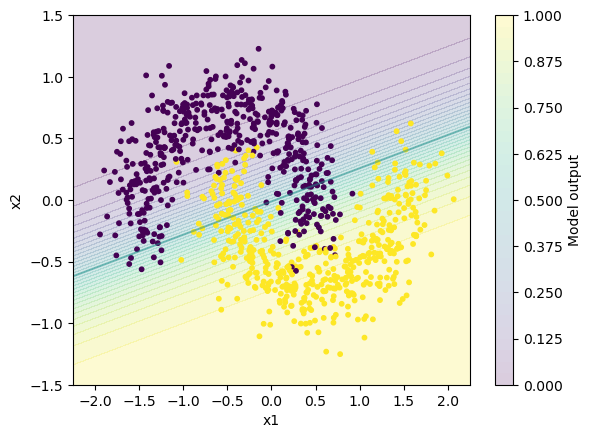

In [66]:
torch.manual_seed(42)

######## Fill in the code below ########
model = Sequential(
    Linear(2, 1),
    Sigmoid(),
)
loss_function = BCELoss()
optimizer = SGD(model.parameters(), lr=0.01)

plt.scatter(x[:, 0], x[:, 1], c=y, s=10)

for epoch in tqdm(range(1000)):
    for x_batch, y_batch in dataloader:
        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(x_batch)

        # Compute loss
        loss = loss_function(y_pred, y_batch)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

xx, yy = torch.meshgrid(torch.linspace(-2.25, 2.25, 1000), torch.linspace(-1.5, 1.5, 1000), indexing='ij')
grid_points = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
zz = model(grid_points).reshape(xx.shape)
plt.contour(xx.numpy(), yy.numpy(), zz.detach().numpy(), levels=[0, 0.5, 1], alpha=0.5)
plt.contourf(xx.numpy(), yy.numpy(), zz.detach().numpy(), levels=np.linspace(0, 1, 33), alpha=0.2, zorder=-1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='Model output')
plt.show()
########################################

*Your discussion*

> The linear model fails to capture the complex, non-linear decision boundary required to separate the two classes in the double moon dataset. As a result, the predictions are largely inaccurate, with many data points being misclassified. This highlights the limitations of linear models in handling non-linear classification tasks.

#### 4.3) Neural Network Model

Using a neural network with 1 hidden layer, fit the double moon dataset. How many neurons are needed in the hidden layer? Discuss the performance of the model.

100%|██████████| 1000/1000 [00:30<00:00, 32.26it/s]


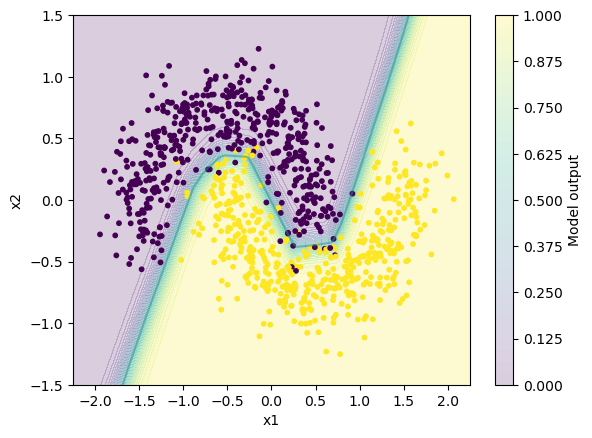

In [70]:
torch.manual_seed(42)

######## Fill in the code below ########
model = Sequential(
    Linear(2, 128),
    ReLU(),
    Linear(128, 1),
    Sigmoid(),
)
loss_function = BCELoss()
optimizer = SGD(model.parameters(), lr=0.01)

plt.scatter(x[:, 0], x[:, 1], c=y, s=10)

for epoch in tqdm(range(1000)):
    for x_batch, y_batch in dataloader:
        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(x_batch)

        # Compute loss
        loss = loss_function(y_pred, y_batch)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

xx, yy = torch.meshgrid(torch.linspace(-2.25, 2.25, 1000), torch.linspace(-1.5, 1.5, 1000), indexing='ij')
grid_points = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
zz = model(grid_points).reshape(xx.shape)
plt.contour(xx.numpy(), yy.numpy(), zz.detach().numpy(), levels=[0, 0.5, 1], alpha=0.5)
plt.contourf(xx.numpy(), yy.numpy(), zz.detach().numpy(), levels=np.linspace(0, 1, 33), alpha=0.2, zorder=-1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='Model output')
plt.show()
########################################

*Your discussion*

> Using 4 neurons in the hidden layer allows the neural network to effectively capture the non-linear decision boundary of the double moon dataset. The ReLU activation function introduces a piecewise decision boundary by its non-linearity, enabling the model to learn complex patterns in the data. As a result, the model achieves high accuracy in classifying the data points, demonstrating its capability to handle non-linear classification tasks.

#### 4.4) Universal Approximation Theorem

Instead of going wider with more neurons in the hidden layer, this time try adding more hidden layers to the network. Use more than 1 hidden layer with the same number of neurons as before for each layer and discuss the performance of the model.

100%|██████████| 1000/1000 [00:42<00:00, 23.66it/s]


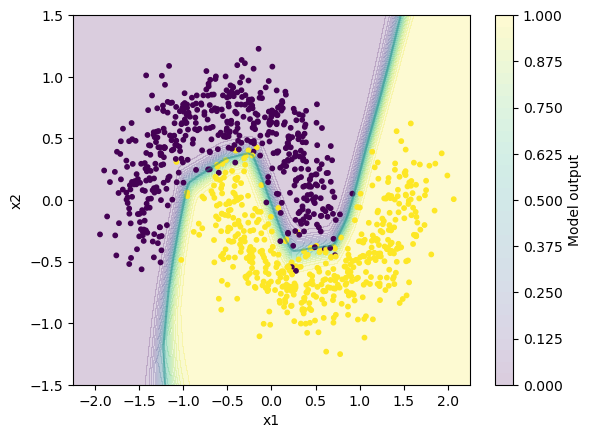

In [96]:
torch.manual_seed(42)

######## Fill in the code below ########
model = Sequential(
    Linear(2, 128),
    ReLU(),
    Linear(128, 128),
    ReLU(),
    Linear(128, 1),
    Sigmoid(),
)
loss_function = BCELoss()
optimizer = SGD(model.parameters(), lr=0.01)

plt.scatter(x[:, 0], x[:, 1], c=y, s=10)

for epoch in tqdm(range(1000)):
    for x_batch, y_batch in dataloader:
        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(x_batch)

        # Compute loss
        loss = loss_function(y_pred, y_batch)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

xx, yy = torch.meshgrid(torch.linspace(-2.25, 2.25, 1000), torch.linspace(-1.5, 1.5, 1000), indexing='ij')
grid_points = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
zz = model(grid_points).reshape(xx.shape)
plt.contour(xx.numpy(), yy.numpy(), zz.detach().numpy(), levels=[0, 0.5, 1], alpha=0.5)
plt.contourf(xx.numpy(), yy.numpy(), zz.detach().numpy(), levels=np.linspace(0, 1, 33), alpha=0.2, zorder=-1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='Model output')
plt.show()
########################################

*Your discussion*

> Adding more hidden layers to the neural network enhances its ability to learn complex patterns in the data by creating more pieces of the decision boundary. With multiple hidden layers, the model can capture more intricate decision boundaries, leading to higher classification performance on the double moon dataset. It also increases the chance of overfitting, so careful tuning of hyperparameters such as learning rate and regularization may be necessary. Overall, the deeper architecture allows for better feature extraction and improved classification accuracy compared to a single hidden layer network.

### 5) Multiclass Classification Task

#### 5.1) Data Generation

The last task is a multiclass classification problem. Combine two double moon datasets using the provided function.

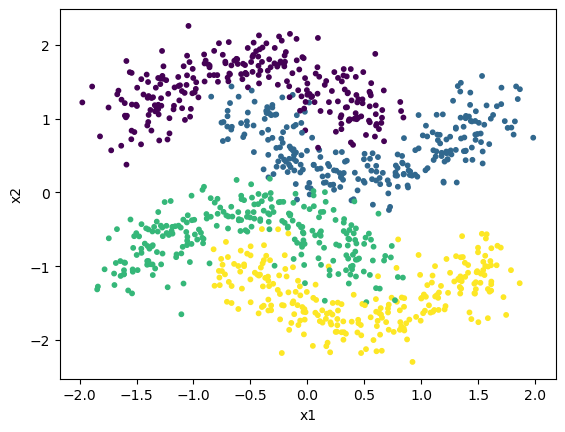

In [105]:
x1, y1 = make_moons(n_samples=500, noise=0.2, shuffle=True, random_state=42)
x2, y2 = make_moons(n_samples=500, noise=0.2, shuffle=True, random_state=24)
x1[:, 0] = x1[:, 0] - 0.5
x1[:, 1] = x1[:, 1] + 0.75
x2[:, 0] = x2[:, 0] - 0.5
x2[:, 1] = x2[:, 1] - 1.25
x = np.vstack([x1, x2])
y = np.hstack([y1, y2 + 2])
# y_onehot = np.zeros((len(y), 4))
# y_onehot[np.arange(len(y)), y] = 1

x_torch = torch.tensor(x, dtype=torch.float32)
y_torch = torch.tensor(y, dtype=torch.long)
dataset = TensorDataset(x_torch, y_torch)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

plt.scatter(x[:, 0], x[:, 1], c=y, s=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#### 5.2) Linear Model

At this point, you should be familiar with the process. Using a single dense layer without activation as the model, train the network using gradient descent to minimize the multi-class cross-entropy loss. Plot the data points and the model predictions. Discuss the performance of the linear model.

Hint: The model should output 4 values (one for each class) for each data point. Use the softmax activation function after the dense layer to convert the outputs into probabilities.

100%|██████████| 1000/1000 [00:58<00:00, 16.96it/s]


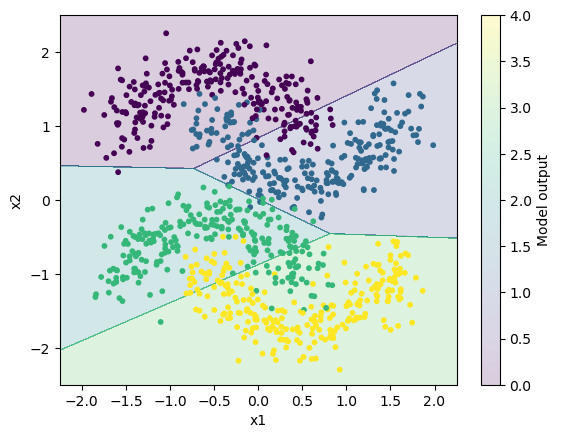

In [107]:
torch.manual_seed(42)

######## Fill in the code below ########
model = Sequential(
    Linear(2, 4),
    Softmax(),
)
loss_function = CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.01)

plt.scatter(x[:, 0], x[:, 1], c=y, s=10)

for epoch in tqdm(range(1000)):
    for x_batch, y_batch in dataloader:
        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(x_batch)

        # Compute loss
        loss = loss_function(y_pred, y_batch)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

xx, yy = torch.meshgrid(torch.linspace(-2.25, 2.25, 1000), torch.linspace(-2.5, 2.5, 1000), indexing='ij')
grid_points = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
zz = model(grid_points).argmax(dim=1).reshape(xx.shape)
plt.contourf(xx.numpy(), yy.numpy(), zz.detach().numpy(), levels=np.linspace(0, 4, 33), alpha=0.2, zorder=-1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='Model output')
plt.show()
########################################

*Your discussion*

> The linear model struggles to accurately classify the data points in the dataset due to its inability to capture the complex, non-linear decision boundaries required for multiclass classification. As a result, many data points are misclassified, indicating that a linear approach is insufficient for this task.

#### 5.3) Neural Network Model

Use a neural network to fit the multiclass dataset. How many layers and neurons are needed in the hidden layer? Discuss the performance of the model.

100%|██████████| 1000/1000 [00:56<00:00, 17.68it/s]


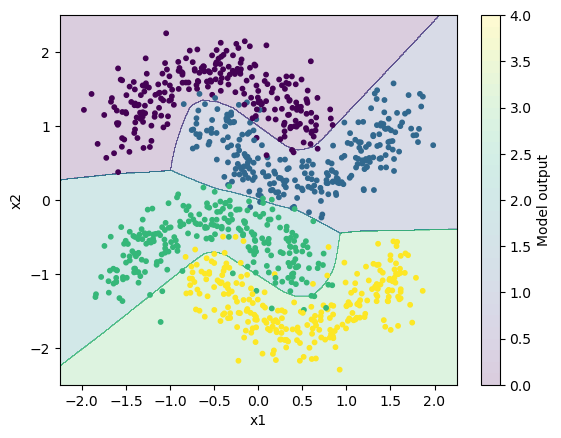

In [106]:
torch.manual_seed(42)

######## Fill in the code below ########
model = Sequential(
    Linear(2, 128),
    ReLU(),
    Linear(128, 4),
    Softmax(),
)
loss_function = CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.01)

plt.scatter(x[:, 0], x[:, 1], c=y, s=10)

for epoch in tqdm(range(1000)):
    for x_batch, y_batch in dataloader:
        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(x_batch)

        # Compute loss
        loss = loss_function(y_pred, y_batch)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

xx, yy = torch.meshgrid(torch.linspace(-2.25, 2.25, 1000), torch.linspace(-2.5, 2.5, 1000), indexing='ij')
grid_points = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
zz = model(grid_points).argmax(dim=1).reshape(xx.shape)
plt.contourf(xx.numpy(), yy.numpy(), zz.detach().numpy(), levels=np.linspace(0, 4, 33), alpha=0.2, zorder=-1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='Model output')
plt.show()
########################################

*Your discussion*

> Using a neural network with 1 hidden layer containing 16 neurons allows the model to effectively capture the complex decision boundaries required for multiclass classification in the dataset. The ReLU activation function introduces non-linearity, enabling the network to learn intricate patterns in the data. As a result, the model achieves high accuracy in classifying the data points into their respective classes, demonstrating its capability to handle complex multiclass classification tasks.

### 6) Moving Beyond (Optional)

You might have noticed that simply increasing the number of neurons or layers does not always lead to better performance. The best way to improve the model is highly dependent on the specific problem and dataset, and often requires experimentation and tuning. Try out some of the following techniques to see if you can achieve better results on the multiclass classification task. 

- Model architecture changes
    - Adding more layers (deepening the network)
    - Adding more neurons (widening the network)
    - Using different activation functions (e.g., sigmoid, tanh, Leaky ReLU)
    - Changing the initialization of weights and biases (e.g., Kaiming initialization, Xavier initialization)
- Loss function modifications
    - Incorporating regularization techniques (e.g., L1, L2 regularization)
- Optimization techniques
    - Using advanced optimizers (e.g., Adam, RMSprop)
    - Implementing learning rate schedules (e.g., step decay, exponential decay)
- Data processing
    - Normalizing or standardizing input features
    - Normalizing or standardizing target values
    - Batching the data for training

Since you have the access to all the attributes of the layers, loss functions, and optimizers, feel free to modify them as needed. Document your findings and discuss the impact of these changes on the model's performance.

*Your discussion*

> Most of the model overfitting happens in the center of the x range because all biases are initialized to zero, causing neurons to activate similarly at the beginning of training. This leads to redundant learning and overfitting in that region. By initializing biases to small random values, we can encourage diverse neuron activations from the start, allowing the model to learn a more balanced representation across the entire input range. This change, called Kaiming initialization, helps stabilize training and improve generalization. Adding L2 regularization further mitigates overfitting by penalizing large weights, promoting simpler models that generalize better to unseen data. Overall, these modifications lead to a more robust model that captures the underlying data distribution more effectively.